In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
data=pd.read_csv('car_price_prediction.csv')

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
data.rename(columns={'Prod. year':'Prod_year','Leather interior':'Leather_interior','Fuel type':'Fuel_type','Engine volume':'Engine_volume','Gear box type':'Gear_box_type','Drive wheels':'Drive_wheels'},inplace=True)

In [8]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [9]:
data.Fuel_type.value_counts()

Fuel_type
Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: count, dtype: int64

In [10]:
data.Manufacturer.value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [11]:
data.Gear_box_type.value_counts()

Gear_box_type
Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: count, dtype: int64

In [12]:
data.replace({'Fuel_type':{'Petrol':0,'Diesel':1,'Hybrid':2,'LPG':3,'CNG':4,'Plug-in Hybrid':5,'Hydrogen':6}},inplace=True)

In [13]:
data.replace({'Gear_box_type':{'Automatic':0,'Tiptronic':1,'Manual':2,'Variator':3}},inplace=True)

In [14]:
data.replace({'Wheel':{'Left wheel':0,'Right-hand drive':1}},inplace=True)

In [15]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,2,3.5,186005 km,6.0,0,4x4,04-May,0,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,0,3,192000 km,6.0,1,4x4,04-May,0,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,0,1.3,200000 km,4.0,3,Front,04-May,1,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,2,2.5,168966 km,4.0,0,4x4,04-May,0,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,0,1.3,91901 km,4.0,0,Front,04-May,0,Silver,4


In [16]:
X=data.drop(['Price','Levy','Model','Category','Manufacturer','Leather_interior','Engine_volume','Mileage','Color','Doors','Drive_wheels'],axis=1)
Y=data['Price']

In [17]:
X

,ID,Prod_year,Fuel_type,Cylinders,Gear_box_type,Wheel,Airbags
0,45654403,2010,2,6.0,0,0,12
1,44731507,2011,0,6.0,1,0,8
2,45774419,2006,0,4.0,3,1,2
3,45769185,2011,2,4.0,0,0,0
4,45809263,2014,0,4.0,0,0,4
...,...,...,...,...,...,...,...
19232,45798355,1999,4,4.0,2,0,5
19233,45778856,2011,0,4.0,1,0,8
19234,45804997,2010,1,4.0,0,0,4
19235,45793526,2007,1,4.0,0,0,4


In [18]:
Y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=10)

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
train_pred=lr.predict(X_train)

In [23]:
error=metrics.r2_score(Y_train,train_pred)
print('Error =',error)

Error = 0.0013009651875645067


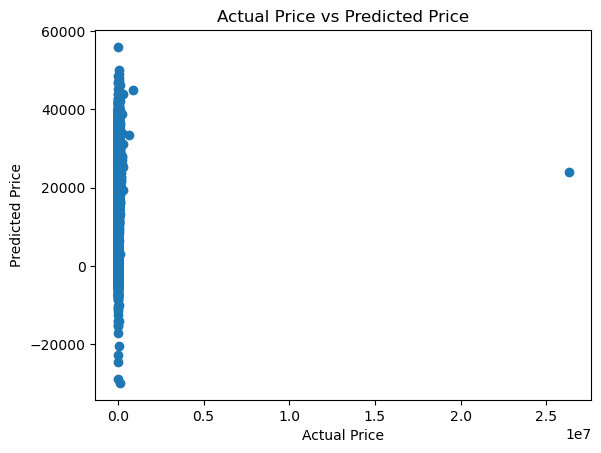

In [24]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [25]:
test_pred=lr.predict(X_test)

In [26]:
error=metrics.r2_score(Y_test,test_pred)
print("Error =",error)

Error = 0.095529392106386


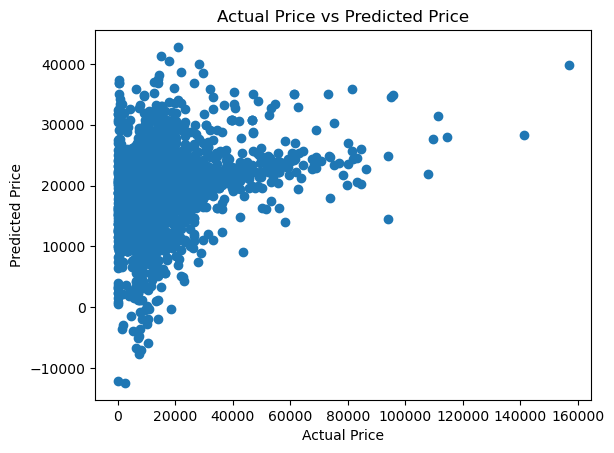

In [27]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()